In [11]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import os

pd.set_option("display.max_columns", None)
np.random.seed(42)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

path_csv = "../data/data_horizons.csv"
path_csv_annotator_ids = '../data/Kartierer_ID.csv'
path_csv_locations = '../data/STANDORT.csv'
path_pictures = "/Users/felix/Library/CloudStorage/Dropbox/data/BGR-Data-Bodenhorizonte/Profilbilder/"
path_images = "images"
path_masks = "masks"

df = pd.read_csv(path_csv, sep=';').dropna(subset=['Bodenart'])
image_dataset = os.listdir(path_pictures)
img_files = pd.DataFrame(image_dataset, columns=['file'])
img_files['Point'] = img_files['file'].str.split("_")\
                            .map(lambda x: x[1]).astype(float)

df = pd.merge(df, img_files, how='inner', on='Point')
df['file'] = df['file'].map(lambda x: os.path.join(path_pictures, x))

df_k = pd.read_csv(path_csv_annotator_ids, sep=';')
df_k = df_k.rename({'PointID':'Point'},axis=1)
df_loc = pd.read_csv(path_csv_locations, sep=';')
df_loc = df_loc.rename({'PointID':'Point'},axis=1)

df = pd.merge(df, df_k, how='inner', on='Point')
df = pd.merge(df, df_loc, how='inner', on='Point')

keep_columns = ['Point', 
                'HorizontID', 
                'Obergrenze', 
                'Untergrenze', 
                'Horizontsymbol',
                'Bodenart', 
                'Bodenfarbe', 
                'Steine', 
                'Karbonat', 
                'Humusgehaltsklasse',
                'Durchwurzelung', 
                'max_depth', 
                'file', 
                'Aufnehmer', 
                'Probenahme_Monat',
                'Probenahme_Jahr', 
                'xcoord', 
                'ycoord', 
                'Bodenklimaraum_Name',
                'Landnutzung', 
                'BZE_Moor', 
                'Hauptbodentyp', 
                'BodenVarTypSub',
                'GrundwaStufe', 
                'GrundwaStand', 
                'Moormaechtigkeit', 
                'Torfmaechtigkeit',
                'Neigung', 
                'Exposition', 
                'Woelbung', 
                'Reliefformtyp', 
                'LageImRelief',
                'KV_0_30', 
                'KV_30_100']

df = df[keep_columns]

df['GrundwaStand'] = df['GrundwaStand'].str.replace('>','').astype(float)
df['xcoord'] = df['xcoord'].str.replace(',','.').astype(float)
df['ycoord'] = df['ycoord'].str.replace(',','.').astype(float)
df['KV_0_30'] = df['KV_0_30'].str.replace(',','.').astype(float)
df['KV_30_100'] = df['KV_30_100'].str.replace(',','.').astype(float)

df

,Point,HorizontID,Obergrenze,Untergrenze,Horizontsymbol,Bodenart,Bodenfarbe,Steine,Karbonat,Humusgehaltsklasse,Durchwurzelung,max_depth,file,Aufnehmer,Probenahme_Monat,Probenahme_Jahr,xcoord,ycoord,Bodenklimaraum_Name,Landnutzung,BZE_Moor,Hauptbodentyp,BodenVarTypSub,GrundwaStufe,GrundwaStand,Moormaechtigkeit,Torfmaechtigkeit,Neigung,Exposition,Woelbung,Reliefformtyp,LageImRelief,KV_0_30,KV_30_100
0,2.0,1.0,0.0,28.0,I; Ap,Sl2,7.5YR 3/2,3.0,C0,h3,Wf4,100.0,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,YE/BB,0,200.0,0,0,N0,NaN,GG,V,Z,81.89,54.19
1,2.0,2.0,28.0,54.0,I; E,Sl2,10YR 3/3,3.0,C0,h2,Wf3,90.0,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,YE/BB,0,200.0,0,0,N0,NaN,GG,V,Z,81.89,54.19
2,2.0,3.0,54.0,68.0,II; Bv,Sl2,7.5YR 4/3,10.0,C0,h1,Wf3,100.0,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,YE/BB,0,200.0,0,0,N0,NaN,GG,V,Z,81.89,54.19
3,2.0,4.0,68.0,96.0,III; Bv-ilCv,fSms,7.5YR 6/4,1.0,C0,h0,Wf2,100.0,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,YE/BB,0,200.0,0,0,N0,NaN,GG,V,Z,81.89,54.19
4,2.0,5.0,96.0,201.0,III; ilCv,mSfs,10YR 7/4,1.0,C0,h0,NaN,100.0,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,11,2015,462216.1283,6079359.775,Marsch - Nord,A,0,YE,YE/BB,0,200.0,0,0,N0,NaN,GG,V,Z,81.89,54.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13332,6211.0,3.0,27.0,50.0,I; Bbh+Bs,fSms,5YR 3/2,1.0,C0,h2,Wf3,NaN,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110.0,0,0,N0,NaN,GG,TSF,T,117.59,87.72
13333,6211.0,4.0,50.0,70.0,I; Bbs+Bs,fSms,5YR 4/3,1.0,C0,h1,Wf2,NaN,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110.0,0,0,N0,NaN,GG,TSF,T,117.59,87.72
13334,6211.0,5.0,70.0,100.0,I; Go-Bbs,fSms,7.5YR 5/4,1.0,C0,h1,Wf6,NaN,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110.0,0,0,N0,NaN,GG,TSF,T,117.59,87.72
13335,6211.0,6.0,100.0,130.0,I; Go,fSms,2.5Y 6/4,1.0,C0,h0,Wf4,NaN,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,6,2012,522076.9633,5930456.114,Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110.0,0,0,N0,NaN,GG,TSF,T,117.59,87.72


In [12]:
# !pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df.drop('file', axis=1), title="Profiling Report")
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df.to_csv('../data/all_horizont_data.csv.gzip', compression='gzip')

In [14]:
counts = df['Horizontsymbol'].str.split(';').map(lambda x: x[1]).value_counts()

In [15]:
counts[:30]

Horizontsymbol
Ap       1087
Bv        471
Ah        402
ilCv      393
rAp       363
elCv      312
Gr        307
Sd        255
Ap2       221
Ap1       221
Swd       203
Go        197
M         194
Bt        168
Sw        167
Gor       138
elC       110
eAp       110
lCv        96
Sw-Bv      93
Sdw        88
Al         78
aGr        76
eSd        73
Bv-Sw      73
R-Ap       71
Gro        70
Btv        65
aGo        65
ilC        65
Name: count, dtype: int64

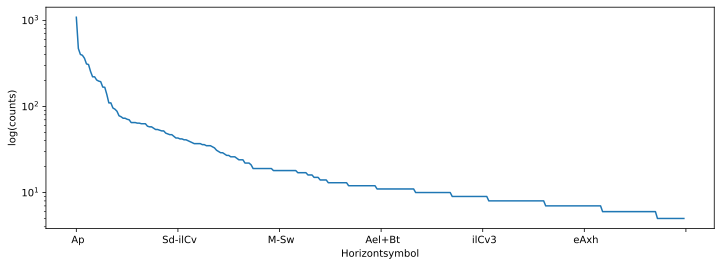

In [16]:
plt.figure(figsize=(12,4))
counts[:300].plot(logy=True);
plt.ylabel('log(counts)');
